# Data manipulation for the final project

## Table of contents
* [Data pre-processing](#processing)
* [Data visualization](#visualization)
* [Modeling](#modeling)
* [API](#api)

<a name="processing">
    <h2>1. Data pre-processing</h2>
</a>
Encoding, normalization, imputation…

### 1.1 Loading the data

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 
           'interlinear spacing', 'weight', 'peak number', 'modular ratio / interlinear spacing', 'class']

In [3]:
train_data = pd.read_csv('avila/avila-tr.txt', names=columns)
train_data.head()

intercolumnar distance  upper margin  lower margin  exploitation  \
0                0.266074     -0.165620      0.320980      0.483299   
1                0.130292      0.870736     -3.210528      0.062493   
2               -0.116585      0.069915      0.068476     -0.783147   
3                0.031541      0.297600     -3.210528     -0.583590   
4                0.229043      0.807926     -0.052442      0.082634   

   row number  modular ratio  interlinear spacing    weight  peak number  \
0    0.172340       0.273364             0.371178  0.929823     0.251173   
1    0.261718       1.436060             1.465940  0.636203     0.282354   
2    0.261718       0.439463            -0.081827 -0.888236    -0.123005   
3   -0.721442      -0.307984             0.710932  1.051693     0.594169   
4    0.261718       0.148790             0.635431  0.051062     0.032902   

   modular ratio / interlinear spacing class  
0                             0.159345     A  
1                             0.515587     A  
2                             0.582939     A  
3                            -0.533994     A  
4                            -0.086652     F

In [4]:
test_data = pd.read_csv('avila/avila-ts.txt', names=columns)
test_data.head()

intercolumnar distance  upper margin  lower margin  exploitation  \
0               -3.498799      0.250492      0.232070      1.224178   
1                0.204355     -0.354049      0.320980      0.410166   
2                0.759828     -1.304042     -0.023991     -0.973663   
3               -0.005490      0.360409      0.281860     -0.213479   
4                0.080916      0.101320      0.104040      0.140490   

   row number  modular ratio  interlinear spacing    weight  peak number  \
0   -4.922215       1.145386             0.182426 -0.165983    -0.123005   
1   -0.989576      -2.218127             0.220177  0.181844     2.090879   
2   -0.006417      -0.349509            -0.421580 -0.450127     0.469443   
3   -1.168333      -1.013906            -0.346080  1.176165     0.968347   
4    0.261718       0.480988             0.710932 -0.253430    -0.497183   

   modular ratio / interlinear spacing class  
0                             1.087144     W  
1                            -2.009758     A  
2                             0.060952     I  
3                            -0.627999     E  
4                             0.155681     A

In [5]:
labels = list(train_data['class'].unique())
labels.sort()
labels

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']

### 1.2 Data Cleaning

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   intercolumnar distance               10430 non-null  float64
 1   upper margin                         10430 non-null  float64
 2   lower margin                         10430 non-null  float64
 3   exploitation                         10430 non-null  float64
 4   row number                           10430 non-null  float64
 5   modular ratio                        10430 non-null  float64
 6   interlinear spacing                  10430 non-null  float64
 7   weight                               10430 non-null  float64
 8   peak number                          10430 non-null  float64
 9   modular ratio / interlinear spacing  10430 non-null  float64
 10  class                                10430 non-null  object 
dtypes: float64(10), object(1)
me

In [7]:
train_data.describe()

intercolumnar distance  upper margin  lower margin  exploitation  \
count            10430.000000  10430.000000  10430.000000  10430.000000   
mean                 0.000852      0.033611     -0.000525     -0.002387   
std                  0.991431      3.920868      1.120202      1.008527   
min                 -3.498799     -2.426761     -3.210528     -5.440122   
25%                 -0.128929     -0.259834      0.064919     -0.528002   
50%                  0.043885     -0.055704      0.217845      0.095763   
75%                  0.204355      0.203385      0.352988      0.658210   
max                 11.819916    386.000000     50.000000      3.987152   

         row number  modular ratio  interlinear spacing        weight  \
count  10430.000000   10430.000000         10430.000000  10430.000000   
mean       0.006370       0.013973             0.005605      0.010323   
std        0.992053       1.126245             1.313754      1.003507   
min       -4.922215      -7.450257           -11.935457     -4.247781   
25%        0.172340      -0.598658            -0.044076     -0.541991   
50%        0.261718      -0.058835             0.220177      0.111803   
75%        0.261718       0.564038             0.446679      0.654944   
max        1.066121      53.000000            83.000000     13.173081   

        peak number  modular ratio / interlinear spacing  
count  10430.000000                         10430.000000  
mean       0.012914                             0.000818  
std        1.087665                             1.007094  
min       -5.486218                            -6.719324  
25%       -0.372457                            -0.516097  
50%        0.064084                            -0.034513  
75%        0.500624                             0.530855  
max       44.000000                             4.671232

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   intercolumnar distance               10437 non-null  float64
 1   upper margin                         10437 non-null  float64
 2   lower margin                         10437 non-null  float64
 3   exploitation                         10437 non-null  float64
 4   row number                           10437 non-null  float64
 5   modular ratio                        10437 non-null  float64
 6   interlinear spacing                  10437 non-null  float64
 7   weight                               10437 non-null  float64
 8   peak number                          10437 non-null  float64
 9   modular ratio / interlinear spacing  10437 non-null  float64
 10  class                                10437 non-null  object 
dtypes: float64(10), object(1)
me

In [9]:
test_data.describe()

intercolumnar distance  upper margin  lower margin  exploitation  \
count            10437.000000  10437.000000  10437.000000  10437.000000   
mean                -0.000852      0.003396      0.005181      0.002616   
std                  1.008551      0.955257      0.992430      0.991443   
min                 -3.498799     -2.426761     -3.210528     -5.440122   
25%                 -0.128929     -0.259834      0.064919     -0.526838   
50%                  0.056229     -0.063555      0.217845      0.087408   
75%                  0.204355      0.203385      0.356544      0.627208   
max                 11.819916     19.470188      7.458681      3.987152   

         row number  modular ratio  interlinear spacing        weight  \
count  10437.000000   10437.000000         10437.000000  10437.000000   
mean      -0.006365      -0.008886             0.002350     -0.010259   
std        1.007876       1.000360             0.966827      0.996431   
min       -4.922215      -7.450257           -11.935457     -4.090167   
25%        0.172340      -0.598658            -0.044076     -0.547709   
50%        0.261718      -0.058835             0.220177      0.103541   
75%        0.261718       0.564038             0.446679      0.639426   
max        1.066121      12.315569             4.901228      4.580832   

        peak number  modular ratio / interlinear spacing  
count  10437.000000                         10437.000000  
mean      -0.008691                            -0.000678  
std        1.001240                             0.992928  
min       -4.737863                            -6.719324  
25%       -0.372457                            -0.514199  
50%        0.064084                            -0.020397  
75%        0.500624                             0.526304  
max        3.213413                            11.911338

The data has already been cleaned; there is no missing values and they seem to be in the adequate format and correctly normalized beforehand, so there is nothing more to do.

### 1.3 Data Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder 

In [11]:
label_encoder = LabelEncoder()

In [12]:
train_data['class'] = label_encoder.fit_transform(train_data['class'])
train_data.head()

intercolumnar distance  upper margin  lower margin  exploitation  \
0                0.266074     -0.165620      0.320980      0.483299   
1                0.130292      0.870736     -3.210528      0.062493   
2               -0.116585      0.069915      0.068476     -0.783147   
3                0.031541      0.297600     -3.210528     -0.583590   
4                0.229043      0.807926     -0.052442      0.082634   

   row number  modular ratio  interlinear spacing    weight  peak number  \
0    0.172340       0.273364             0.371178  0.929823     0.251173   
1    0.261718       1.436060             1.465940  0.636203     0.282354   
2    0.261718       0.439463            -0.081827 -0.888236    -0.123005   
3   -0.721442      -0.307984             0.710932  1.051693     0.594169   
4    0.261718       0.148790             0.635431  0.051062     0.032902   

   modular ratio / interlinear spacing  class  
0                             0.159345      0  
1                             0.515587      0  
2                             0.582939      0  
3                            -0.533994      0  
4                            -0.086652      5

In [13]:
min(train_data['class']), max(train_data['class'])

(0, 11)

In [14]:
test_data['class'] = label_encoder.fit_transform(test_data['class'])
test_data.head()

intercolumnar distance  upper margin  lower margin  exploitation  \
0               -3.498799      0.250492      0.232070      1.224178   
1                0.204355     -0.354049      0.320980      0.410166   
2                0.759828     -1.304042     -0.023991     -0.973663   
3               -0.005490      0.360409      0.281860     -0.213479   
4                0.080916      0.101320      0.104040      0.140490   

   row number  modular ratio  interlinear spacing    weight  peak number  \
0   -4.922215       1.145386             0.182426 -0.165983    -0.123005   
1   -0.989576      -2.218127             0.220177  0.181844     2.090879   
2   -0.006417      -0.349509            -0.421580 -0.450127     0.469443   
3   -1.168333      -1.013906            -0.346080  1.176165     0.968347   
4    0.261718       0.480988             0.710932 -0.253430    -0.497183   

   modular ratio / interlinear spacing  class  
0                             1.087144      9  
1                            -2.009758      0  
2                             0.060952      8  
3                            -0.627999      4  
4                             0.155681      0

In [15]:
min(test_data['class']), max(test_data['class'])

(0, 11)

### 1.4 Splitting

In [16]:
x_train = train_data.drop('class', axis=1)
x_train.head()

intercolumnar distance  upper margin  lower margin  exploitation  \
0                0.266074     -0.165620      0.320980      0.483299   
1                0.130292      0.870736     -3.210528      0.062493   
2               -0.116585      0.069915      0.068476     -0.783147   
3                0.031541      0.297600     -3.210528     -0.583590   
4                0.229043      0.807926     -0.052442      0.082634   

   row number  modular ratio  interlinear spacing    weight  peak number  \
0    0.172340       0.273364             0.371178  0.929823     0.251173   
1    0.261718       1.436060             1.465940  0.636203     0.282354   
2    0.261718       0.439463            -0.081827 -0.888236    -0.123005   
3   -0.721442      -0.307984             0.710932  1.051693     0.594169   
4    0.261718       0.148790             0.635431  0.051062     0.032902   

   modular ratio / interlinear spacing  
0                             0.159345  
1                             0.515587  
2                             0.582939  
3                            -0.533994  
4                            -0.086652

In [17]:
y_train = train_data['class']
y_train

0         0
1         0
2         0
3         0
4         5
         ..
10425     5
10426     5
10427     0
10428     4
10429    10
Name: class, Length: 10430, dtype: int32

In [18]:
x_test = test_data.drop('class', axis=1)
x_test.head()

intercolumnar distance  upper margin  lower margin  exploitation  \
0               -3.498799      0.250492      0.232070      1.224178   
1                0.204355     -0.354049      0.320980      0.410166   
2                0.759828     -1.304042     -0.023991     -0.973663   
3               -0.005490      0.360409      0.281860     -0.213479   
4                0.080916      0.101320      0.104040      0.140490   

   row number  modular ratio  interlinear spacing    weight  peak number  \
0   -4.922215       1.145386             0.182426 -0.165983    -0.123005   
1   -0.989576      -2.218127             0.220177  0.181844     2.090879   
2   -0.006417      -0.349509            -0.421580 -0.450127     0.469443   
3   -1.168333      -1.013906            -0.346080  1.176165     0.968347   
4    0.261718       0.480988             0.710932 -0.253430    -0.497183   

   modular ratio / interlinear spacing  
0                             1.087144  
1                            -2.009758  
2                             0.060952  
3                            -0.627999  
4                             0.155681

In [19]:
y_test = test_data['class']
y_test

0         9
1         0
2         8
3         4
4         0
         ..
10432    10
10433     6
10434     0
10435     5
10436     7
Name: class, Length: 10437, dtype: int32

<a name="visualization">
    <h2>2. Data visualization</h2>
</a>
Showing the link between the variables and the target.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [22]:
plt.style.use('fivethirtyeight')

In [23]:
avila = pd.concat([train_data, test_data])
avila.head()

intercolumnar distance  upper margin  lower margin  exploitation  \
0                0.266074     -0.165620      0.320980      0.483299   
1                0.130292      0.870736     -3.210528      0.062493   
2               -0.116585      0.069915      0.068476     -0.783147   
3                0.031541      0.297600     -3.210528     -0.583590   
4                0.229043      0.807926     -0.052442      0.082634   

   row number  modular ratio  interlinear spacing    weight  peak number  \
0    0.172340       0.273364             0.371178  0.929823     0.251173   
1    0.261718       1.436060             1.465940  0.636203     0.282354   
2    0.261718       0.439463            -0.081827 -0.888236    -0.123005   
3   -0.721442      -0.307984             0.710932  1.051693     0.594169   
4    0.261718       0.148790             0.635431  0.051062     0.032902   

   modular ratio / interlinear spacing  class  
0                             0.159345      0  
1                             0.515587      0  
2                             0.582939      0  
3                            -0.533994      0  
4                            -0.086652      5

### 2.1 Class Distribution Plot

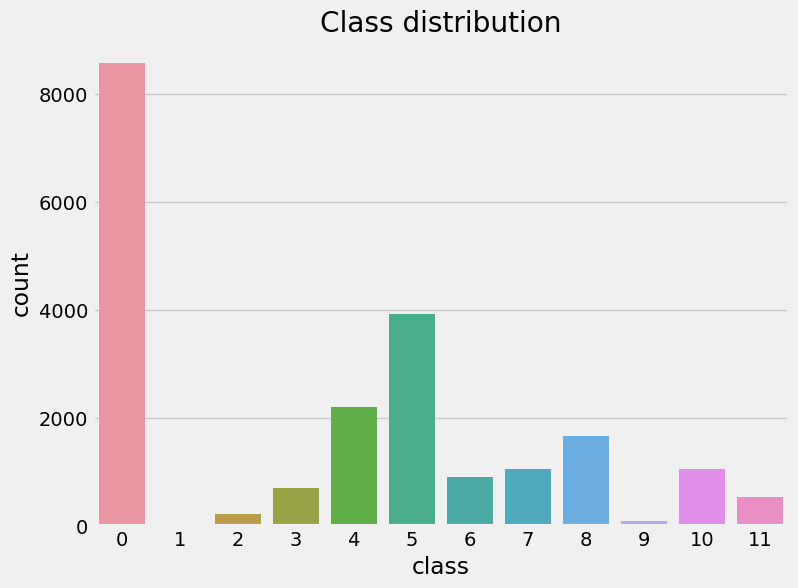

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=avila)
plt.title('Class distribution')
plt.show()

We notice that the training dataset is quite imbalanced, that could affect our models' performance down the road.

### 2.2 Correlation matrix

In [25]:
import numpy as np

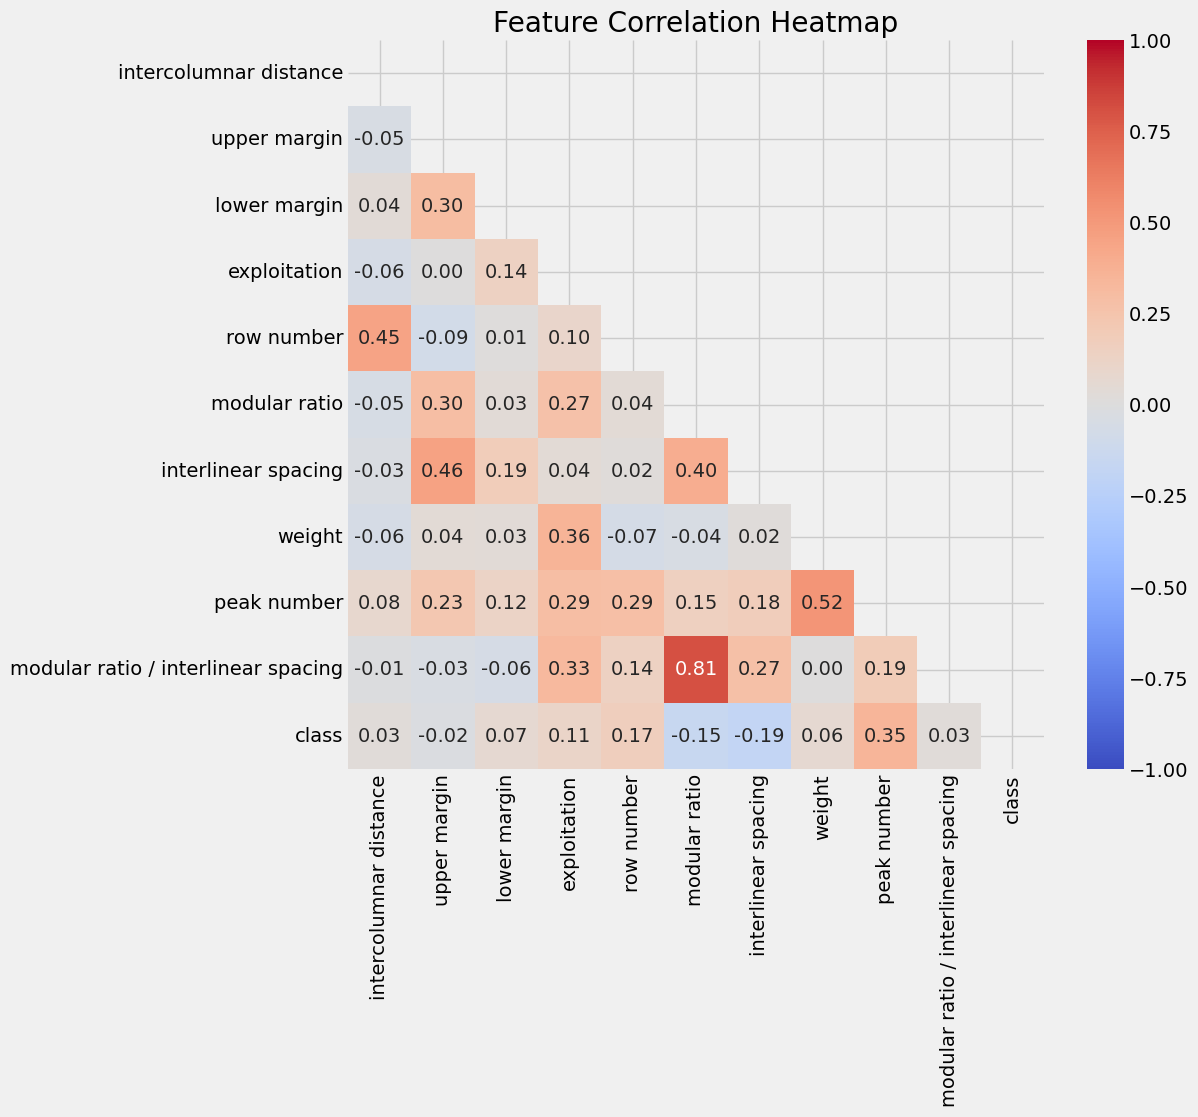

In [26]:
correlation_matrix = avila.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask, 
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

From this correlation matrix, we can suppose that the features with the most "impact" on the classification are most likely:
- peak number
- row number
- weight

### 2.3 Pair plots with Panel

In [27]:
import panel as pn

In [28]:
pn.extension()

In [29]:
avila.columns

Index(['intercolumnar distance', 'upper margin', 'lower margin',
       'exploitation', 'row number', 'modular ratio', 'interlinear spacing',
       'weight', 'peak number', 'modular ratio / interlinear spacing',
       'class'],
      dtype='object')

In [30]:
x = pn.widgets.Select(name='x', options=list(avila.drop('class', axis=1).columns), value='intercolumnar distance')
x

Select(name='x', options=['intercolumnar distance',...], value='intercolumnar distance')

In [31]:
y = pn.widgets.Select(name='y', options=list(avila.drop('class', axis=1).columns), value='peak number')
y

Select(name='y', options=['intercolumnar distance',...], value='peak number')

In [32]:
def scatter(x, y):
    fig = plt.figure(figsize=(5, 4))
    ax = fig.subplots()
    sns.scatterplot(data=avila, x=x, y=y, hue='class', ax=ax)
    ax.set_title('Pair Plot of Features by Class')
    plot = pn.pane.Matplotlib(fig, dpi=144, tight=True)
    plt.close(fig) # Close the figure to avoid displaying it in the cell
    return plot

In [33]:
interactive_plot = pn.bind(scatter, x, y)

Column
    [0] WidgetBox
        [0] Column
            [0] Select(name='x', options=['intercolumnar distance',...], value='intercolumnar distance')
            [1] Select(name='y', options=['intercolumnar distance',...], value='peak number')
    [1] ParamFunction(function, _pane=Matplotlib, defer_load=False)
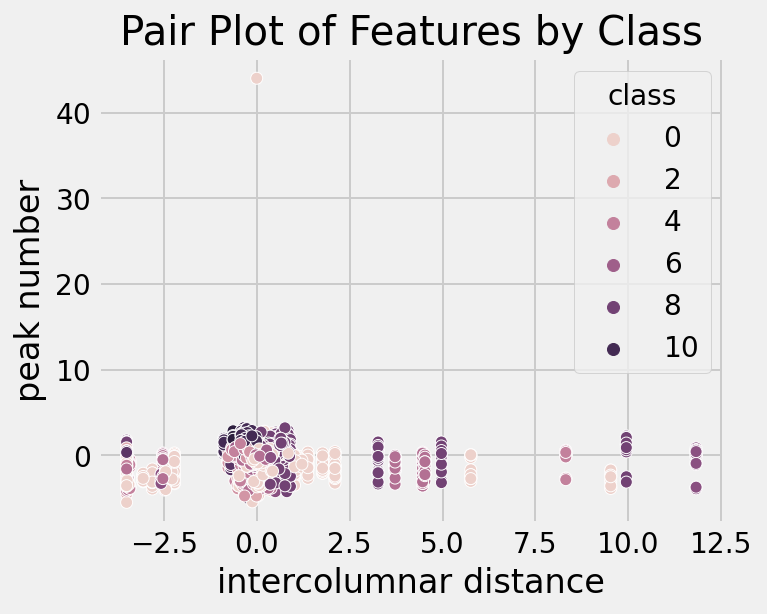

In [34]:
pairplot = pn.Column(pn.WidgetBox(pn.Column(x, y)),
                     interactive_plot)
pairplot

**Main takeaways:**
* Plotting the pair `weight` and `peak number` appears to support the idea that there is a mutual growth relationship between the two, which causes the point distribution to fan out.
* `weight` and `row number`: 
* `modular ratio` and `row number`: There seems to be somewhat of a cluster at the top of the plot, which shows that class 8 samples tend to have a higher `row number` value.
* We can actually see the outline of a linear relationship between `weight` and `peak number`. But a pattern between classes does not seem to appear.

### 2.4 Feature Distribution Histograms

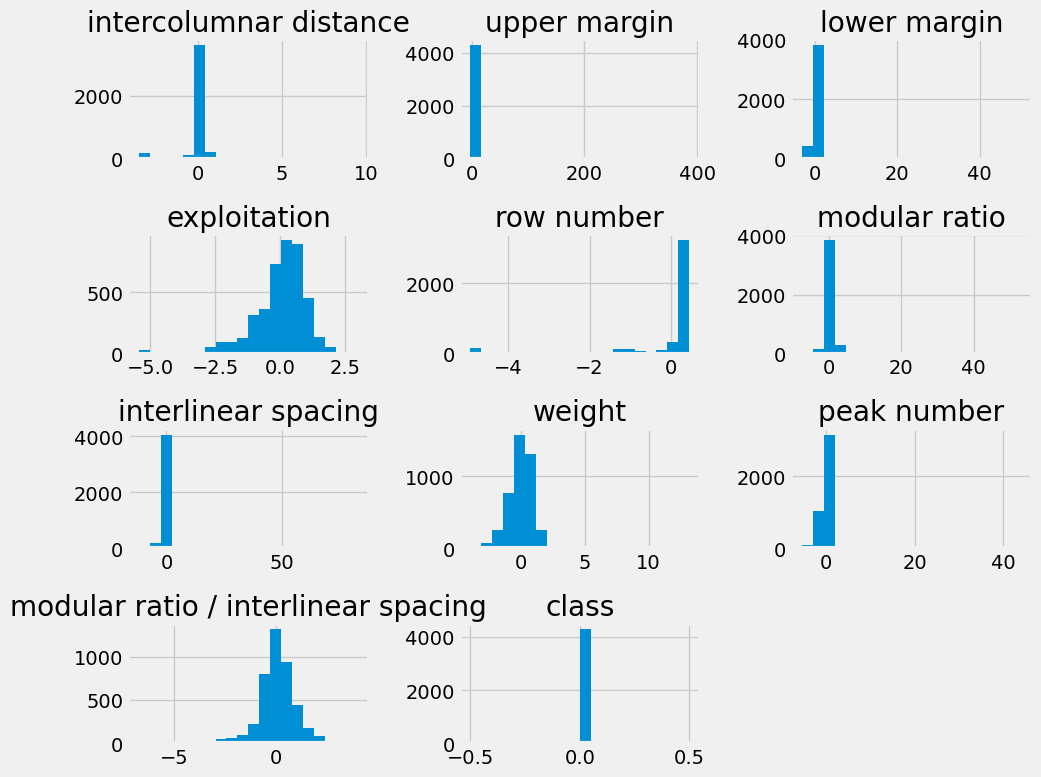

In [35]:
train_data[train_data['class'] == 0].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [36]:
pn.extension('ipywidgets')

Column
    [0] Select(name='Chosen class', options=['A', 'B', 'C', ...], value='A')
    [1] ParamFunction(function, _pane=Matplotlib, defer_load=False)
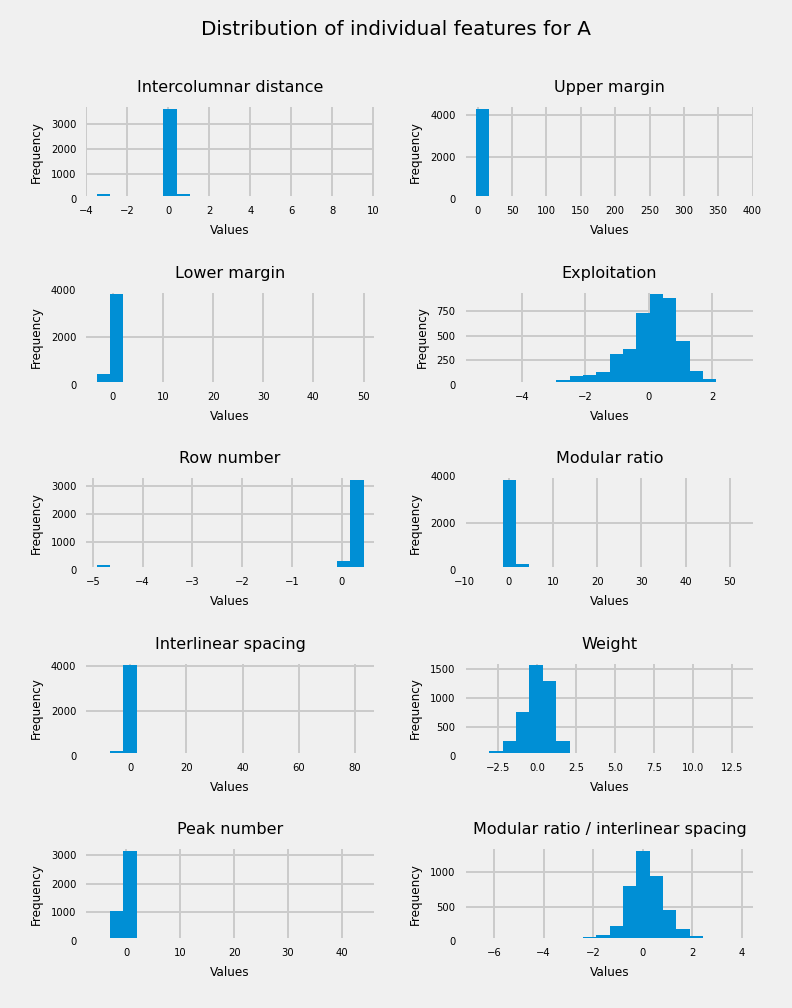

In [37]:
select_class = pn.widgets.Select(name='Chosen class', 
                                 options=labels, value='A')
def class_hist(chosen_class):
    fig, axes = plt.subplots(5, 2, figsize=(5.5, 7))  # Create a 5x2 subplot grid
    axes = axes.flatten()  # Flatten the axes array to loop through

    # Plot histograms for each feature in the selected class
    for i, col in enumerate(train_data.drop('class', axis=1).columns):
        train_data[train_data['class'] == labels.index(chosen_class)][col].hist(bins=20, ax=axes[i])
        axes[i].set_title(col.capitalize(), fontsize=8)
        axes[i].set_ylabel('Frequency', fontsize=6)
        axes[i].set_xlabel('Values', fontsize=6)
        axes[i].tick_params(axis='both', which='major', labelsize=5) 
    
    fig.suptitle(f'Distribution of individual features for {chosen_class.title()}', fontsize=10)
    
    plt.tight_layout()
    plot = pn.pane.Matplotlib(fig, dpi=144)
    plt.close(fig)
    return plot

interactive_hist = pn.bind(class_hist, select_class)
hist_plots = pn.Column(select_class, interactive_hist)
hist_plots

**Main takeaways:**
* Class A
  * All samples in this class have the same `upper margin`
* Class B
  * All samples share the same `intercolumnar distance`, `upper margin`, `lower margin`, `exploitation` and `row number`
* The `weight` does not seem to greatly affect any classes, as the values never really have **one** considerably higher frequency than others.
* The `row number` for classes from D to I seem to be concentrated on one value. The value changes with the class, so this feature might be a differentiator when other features are too alike.

### 2.5 Ultimate Density Dashboard

***Not that, but rather a dashboard allowing the user to input the desired type of plot. And if they want all the features or just focus on one.***

For more clarity, I could also use a regular density plot to visualize the distribution of the features per class.

*Notes:*
- Check boxes for 'all features' or 'one feature'. **Radio buttons**
- Disable the use of the features select box if 'all features' is selected
- Radio buttons for the type of plot to display (hist, kde or ecdf)

#### Defining the Panel elements

In [38]:
feature_select = pn.widgets.Select(name='Selected Feature', 
                                   options=list(avila.drop('class', axis=1).columns), value='intercolumnar distance')

plot_type_radio = pn.widgets.RadioButtonGroup(name='Plot Type', options=['hist', 'kde', 'ecdf'])

all_features_checkbox = pn.widgets.Checkbox(name='All Features')

all_classes_checkbox = pn.widgets.Checkbox(name='Whole dataset')

class_select = pn.widgets.Select(name='Selected Class', options=labels, value='A')

#### Creating the layout

In [39]:
feature_controls = pn.WidgetBox(all_features_checkbox, feature_select, plot_type_radio)
feature_controls

WidgetBox
    [0] Checkbox(name='All Features')
    [1] Select(options=['intercolumnar distance',...], value='intercolumnar distance')
    [2] RadioButtonGroup(name='Plot Type', options=['hist', 'kde', 'ecdf'], value='hist')

In [40]:
class_controls = pn.WidgetBox(all_classes_checkbox, class_select)
class_controls

WidgetBox
    [0] Checkbox(name='Whole dataset')
    [1] Select(options=['A', 'B', 'C', ...], value='A')

In [41]:
plots = pn.Column(pn.Row(feature_controls, class_controls), 
                  None)

#### Displaying Subplots method

In [42]:
def display_subplots(data, plot):
    fig, axes = plt.subplots(5, 2, figsize=(5.5, 7))  # Create a 5x2 subplot grid
    axes = axes.flatten()  # Flatten the axes array to loop through

    # Plot histograms for each feature in the selected class
    for i, col in enumerate(data.drop('class', axis=1).columns):
        if plot == 'hist':
            data[col].hist(bins=20, ax=axes[i])
        elif plot == 'kde':
            sns.kdeplot(data[col], ax=axes[i])
        elif plot == 'ecdf':
            sns.ecdfplot(data[col], ax=axes[i])
        
        
        axes[i].set_title(col.capitalize(), fontsize=8)
        axes[i].set_ylabel('Frequency', fontsize=6)
        axes[i].set_xlabel('Values', fontsize=6)
        axes[i].tick_params(axis='both', which='major', labelsize=5) 
    
    comp_title = 'for class ' + class_select.value if not all_classes_checkbox.value else ''
    fig.suptitle(f'Distribution of individual features {comp_title}', 
                 fontsize=10)
    
    plt.tight_layout()
    plot = pn.pane.Matplotlib(fig, dpi=144)
    plt.close(fig)
    return fig

#### Callback methods

In [43]:
# disable the select features if 'all features' checked
def update_feature_options(event):
    if event.new:
        feature_select.disabled = True
    else:
        feature_select.disabled = False

In [44]:
def update_class_options(event):
    if event.new:
        class_select.disabled = True
    else:
        class_select.disabled = False

In [45]:
def update_plot(event):
    
    plt.clf()
    
    data = train_data if all_classes_checkbox.value else train_data[train_data['class'] == labels.index(class_select.value)]
    
    #selected_features = data.columns if all_features_checkbox.value else [feature_select.value]
    if all_features_checkbox.value == False:
        plot = plt.figure(figsize=(8, 5))
        if plot_type_radio.value == 'hist':
            sns.histplot(data=data[feature_select.value], kde=False, label=feature_select.value)
        elif plot_type_radio.value == 'kde':
            sns.kdeplot(data=data[feature_select.value], label=feature_select.value)
        elif plot_type_radio.value == 'ecdf':
            sns.ecdfplot(data=data[feature_select.value], label=feature_select.value)
            
        plt.xlabel('Values')
        plt.ylabel('Density' if plot_type_radio.value != 'ecdf' else 'Cumulative Density')
        
        comp_title = 'for class ' + class_select.value if not all_classes_checkbox.value else ''
        plt.title(f'Density Plot for {feature_select.value} {comp_title}')
        
        plt.tight_layout()
        plots[1] = pn.pane.Matplotlib(plot)
    else:
        plots[1] = pn.pane.Matplotlib(display_subplots(data, plot_type_radio.value))

#### Setting up event callbacks

In [46]:
all_features_checkbox.param.watch(update_feature_options, 'value')
all_classes_checkbox.param.watch(update_class_options, 'value')
feature_select.param.watch(update_plot, 'value')
class_select.param.watch(update_plot, 'value')
plot_type_radio.param.watch(update_plot, 'value')

all_features_checkbox.param.watch(update_plot, 'value')
all_classes_checkbox.param.watch(update_plot, 'value')

Watcher(inst=Checkbox(name='Whole dataset'), cls=<class 'panel.widgets.input.Checkbox'>, fn=<function update_plot at 0x00000219378AC160>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

Launching server at http://localhost:52236


<Figure size 640x480 with 0 Axes>

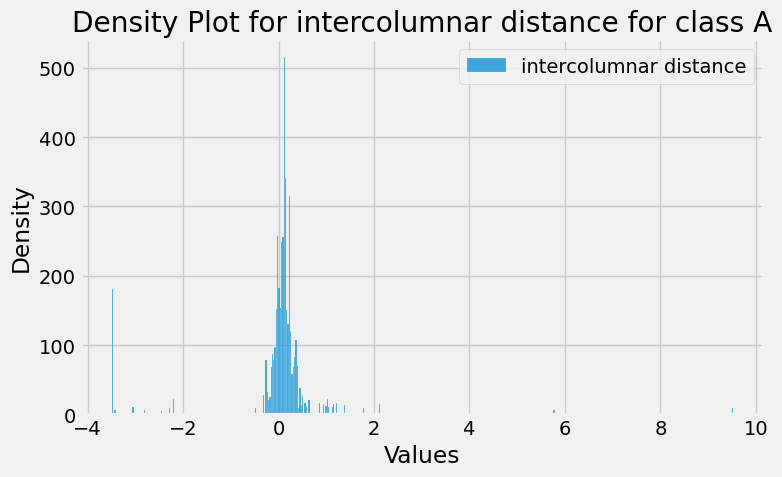

In [47]:
update_plot(None)
plots.show()

<a name="modeling">
    <h2>3. Modeling</h2>
</a>
Using the scikit-learn library to try several algorithms, change the hyper parameters, do a grid search, compare the results of your models using graphics

In [46]:
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Other necessary imports
from sklearn.model_selection import cross_val_score

## Metrics
from sklearn.metrics import (classification_report, matthews_corrcoef, multilabel_confusion_matrix, log_loss, precision_score, 
                            f1_score)

### 3.0 Reporting the possible classifiers

In [47]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='multi:softprob'),
    'KNN': KNeighborsClassifier(),
    'Support Vector Machine (SVM)': SVC(random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
}

### 3.1 Function definitions

In [49]:
def evaluate_model(model, name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    matt = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    
    print(f'------------------- {name} model -------------------')
    print(classification_report(y_test, y_pred))
    print(f'Matthews Correlation Coefficient (MCC): {matt}\n\n')
    
    return {
        'MCC': matt,
        'F1 score': f1,
        'Precision': precision
    }

I originally wanted to use the AUC-ROC as a metric as we've already in class before, but this metric is exclusively used for **binary classification**, yet our problem is a **multi-class classification**.\
After some research, I opted for the Matthew's Correlation Coefficient (MCC); a metric which measures the quality of binary classifications in a multi-class problem.\
The other metrics we will use are F1 score and precision.

Explanation:
- MCC provides a balanced measure of classification performance, especially useful for imbalanced datasets (which is our case).
  - MCC ranges from -1 to 1, where 1 indicates a perfect prediction, 0 means no better than random prediction, and -1 implies a total disagreement between prediction and observation.
- F1 Score balances precision and recall, making it suitable when both false positives and false negatives are important.
  - F1 Score ranges from 0 (worst) to 1 (best), with higher values indicating better model performance.
- Precision focuses on the accuracy of positive predictions and is useful when false positives need to be minimized.
  - It answers the question: "Of all the samples predicted as positive, how many were actually positive?"
  - It ranges from 0 to 1, where 1 indicates perfect precision (all positive predictions are correct), and 0 means no positive predictions are correct.

### 3.2 Testing the models to find the most promising

In [50]:
import plotly.express as px

To compare the different models, I'll store their coefficients in a dictionary which we'll use later for clearer visualizations. 

In [51]:
coeffs = {}

for name, model in classifiers.items():
    coeffs[name] = evaluate_model(model, name)

------------------- Logistic Regression model -------------------
              precision    recall  f1-score   support

           0       0.53      0.94      0.68      4286
           1       1.00      1.00      1.00         5
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       353
           4       0.53      0.25      0.34      1095
           5       0.37      0.09      0.15      1962
           6       0.00      0.00      0.00       447
           7       0.46      0.18      0.26       520
           8       0.85      0.87      0.86       832
           9       0.29      0.04      0.08        45
          10       0.74      0.70      0.72       522
          11       0.71      0.64      0.67       267

    accuracy                           0.56     10437
   macro avg       0.46      0.39      0.40     10437
weighted avg       0.49      0.56      0.48     10437

Matthews Correlation Coefficient (MCC): 0.40157672502537134


-----

------------------- Bagging model -------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4286
           1       1.00      1.00      1.00         5
           2       0.97      1.00      0.99       103
           3       0.97      0.96      0.97       353
           4       0.97      0.97      0.97      1095
           5       0.99      0.98      0.99      1962
           6       1.00      0.98      0.99       447
           7       0.98      0.97      0.98       520
           8       1.00      0.99      1.00       832
           9       0.90      0.98      0.94        45
          10       0.94      0.95      0.95       522
          11       0.99      0.92      0.95       267

    accuracy                           0.98     10437
   macro avg       0.97      0.98      0.98     10437
weighted avg       0.98      0.98      0.98     10437

Matthews Correlation Coefficient (MCC): 0.9795761996254195




#### 3.2.1 Metrics comparison

* MCC
* F1-score
* Precision

In [52]:
coeffs

{'Logistic Regression': {'MCC': 0.40157672502537134,
  'F1 score': 0.47698236253005033,
  'Precision': 0.49108616979743563},
 'Random Forest': {'MCC': 0.9799608711443792,
  'F1 score': 0.9845617401116308,
  'Precision': 0.9847147853445035},
 'XGBoost': {'MCC': 0.997760420822696,
  'F1 score': 0.9982765984095398,
  'Precision': 0.998293406139125},
 'KNN': {'MCC': 0.6668147503288695,
  'F1 score': 0.7447086265161807,
  'Precision': 0.7519712844989925},
 'Support Vector Machine (SVM)': {'MCC': 0.5673033941924198,
  'F1 score': 0.634959376478125,
  'Precision': 0.6887914124198363},
 'Neural Network': {'MCC': 0.7153366456411582,
  'F1 score': 0.778619406930925,
  'Precision': 0.7818092317372374},
 'Decision Tree': {'MCC': 0.9608171151174155,
  'F1 score': 0.96985322556223,
  'Precision': 0.9699941690496195},
 'LDA': {'MCC': 0.31053671873917194,
  'F1 score': 0.4091214112178723,
  'Precision': 0.44877134273477065},
 'Ada Boost': {'MCC': 0.24897384535322867,
  'F1 score': 0.3397307079670567,


In [53]:
coeff_df = pd.DataFrame.from_dict(coeffs, orient='index', columns=['MCC', 'F1 score', 'Precision'])
coeff_df

MCC  F1 score  Precision
Logistic Regression           0.401577  0.476982   0.491086
Random Forest                 0.979961  0.984562   0.984715
XGBoost                       0.997760  0.998277   0.998293
KNN                           0.666815  0.744709   0.751971
Support Vector Machine (SVM)  0.567303  0.634959   0.688791
Neural Network                0.715337  0.778619   0.781809
Decision Tree                 0.960817  0.969853   0.969994
LDA                           0.310537  0.409121   0.448771
Ada Boost                     0.248974  0.339731   0.288440
Bagging                       0.979576  0.984269   0.984385

In [54]:
sorted_coeff_df = coeff_df.sort_values(by=['MCC', 'F1 score', 'Precision'], ascending=False)
sorted_coeff_df

MCC  F1 score  Precision
XGBoost                       0.997760  0.998277   0.998293
Random Forest                 0.979961  0.984562   0.984715
Bagging                       0.979576  0.984269   0.984385
Decision Tree                 0.960817  0.969853   0.969994
Neural Network                0.715337  0.778619   0.781809
KNN                           0.666815  0.744709   0.751971
Support Vector Machine (SVM)  0.567303  0.634959   0.688791
Logistic Regression           0.401577  0.476982   0.491086
LDA                           0.310537  0.409121   0.448771
Ada Boost                     0.248974  0.339731   0.288440

In [55]:
fig = go.Figure()

colors = ['salmon', 'cornflowerblue', 'lightgreen']

for i, metric in enumerate(list(sorted_coeff_df.columns)):
    fig.add_trace(go.Bar(x=sorted_coeff_df.index,
                         y=sorted_coeff_df[metric],
                         name=metric,
                         marker_color=colors[i]
                        ))

# Customize the layout (optional)
fig.update_layout(  # Create grouped bars
    title='Metrics for each model',
    xaxis_title='Model',
    yaxis_title='Metrics',
    xaxis_tickangle=-45,  # Rotate x-axis labels
    width=1000,  # Set the width
    height=700  # Set the height
)

# Show the Plotly figure
fig.show()

Three models stand out:
* XGBoost
* Random Forest
* Bagging

### 3.3 Finding the best hyperparameters

In [56]:
from sklearn.model_selection import GridSearchCV, learning_curve

In [57]:
tuned_coeffs = {}

#### 3.3.1 Method to find the hyperparameters

In [58]:
def find_best_hyperparameters(model, param, x, y):
    grid_search = GridSearchCV(model, param, cv=5)
    grid_search.fit(x, y)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    return best_params, best_score, best_model

In [59]:
# method to compare the values of the test pool and the predicted ones
def compare_values(test, pred):
    sns.kdeplot(pred, color='r', label='Predicted Values')
    sns.kdeplot(test, color='b', label='Actual Values')
    plt.title('Actual vs Predicted Values', fontsize=12)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(loc='upper left', fontsize=13)

In [60]:
def show_learning_curve(model):
    # learning curve
    N, train_scores, test_scores = learning_curve(model, x_train, y_train,
                                                  train_sizes=np.linspace(0.2, 1.0, 5), cv=5)
    # print(N)

    plt.plot(N, train_scores.mean(axis=1), label='train')
    plt.plot(N, test_scores.mean(axis=1), label='validation')
    plt.xlabel('train_sizes')
    plt.legend()

#### 3.3.2 Tuning XGBoost

In [61]:
xgb_model = classifiers['XGBoost']
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [62]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [63]:
best_params, best_score, best_model = find_best_hyperparameters(xgb_model, param_grid, x_train, y_train)
best_params, best_score, best_model

({'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300},
 0.9962607861936721,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=300, n_jobs=None, num_parallel_tree=None,
               objective='multi:softprob', predictor=None, ...))

In [64]:
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(x_train, y_train)
xgb_pred = best_model.predict(x_test)

In [65]:
tuned_coeffs['XGBoost'] = {
    'MCC': matthews_corrcoef(y_test, xgb_pred),
    'F1 score': f1_score(y_test, xgb_pred, average='weighted'),
    'Precision': precision_score(y_test, xgb_pred, average='weighted')
}

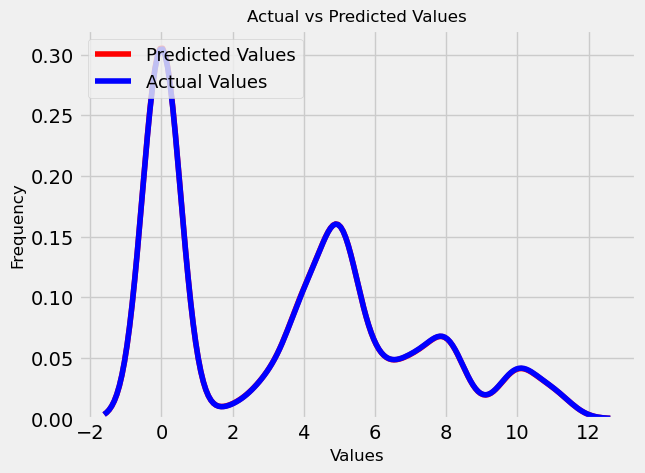

In [66]:
compare_values(y_test, xgb_pred)

The two curves are **blended into each other**, which shows a nearly perfect (as we can see a little of red along the blue curve) prediction. This model is performing quite well!

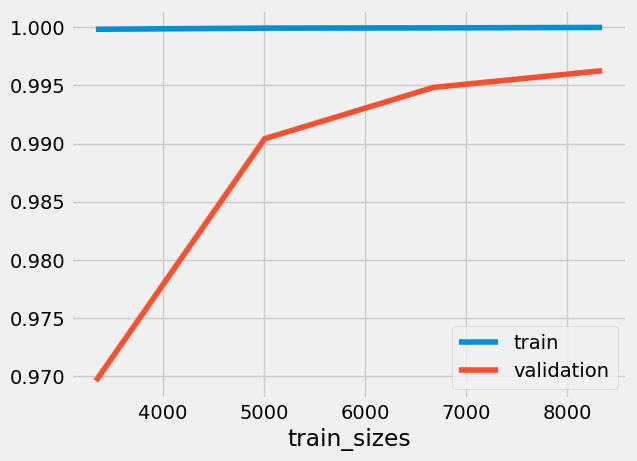

In [67]:
show_learning_curve(xgb_model)

In the **XGBoost model** case, the knee of the learning curve is at around **7000 training samples**. This suggests that the model would benefit from being trained on a dataset of at least 7000 samples, but that training on a larger dataset would not necessarily improve its generalization performance.

#### 3.3.3 Bagging Classifier

In [68]:
bagging_model = classifiers['Bagging']
bagging_model

BaggingClassifier(random_state=42)

In [69]:
param_grid = {
    'n_estimators': [1, 10, 50, 100],
    'max_features': [1, 2, 5, 10],
    'max_samples': [10, 20, 50, 100, 1000],
    'bootstrap': [True, False]
}

In [70]:
best_params, best_score, best_model = find_best_hyperparameters(bagging_model, param_grid, x_train, y_train)
best_params, best_score, best_model

({'bootstrap': False,
  'max_features': 10,
  'max_samples': 1000,
  'n_estimators': 100},
 0.8883988494726749,
 BaggingClassifier(bootstrap=False, max_features=10, max_samples=1000,
                   n_estimators=100, random_state=42))

Matthews Correlation Coefficient (MCC):  0.8642843027754116


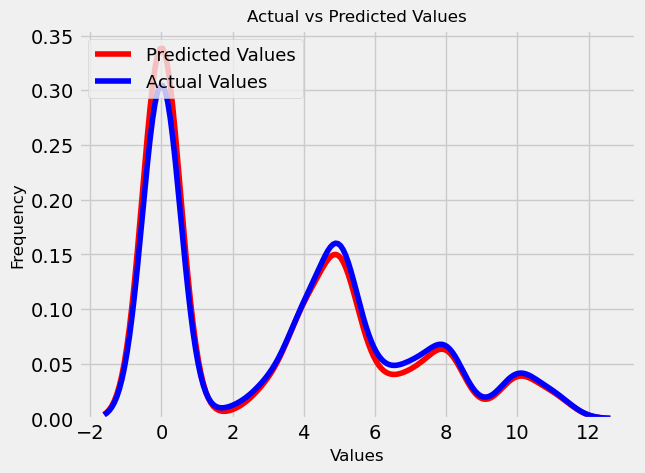

In [71]:
bagging_model = best_model
bagging_model.fit(x_train, y_train)
bagging_y_pred = bagging_model.predict(x_test)
print('Matthews Correlation Coefficient (MCC): ', matthews_corrcoef(y_test, bagging_y_pred))

# simple comparaison
compare_values(y_test, bagging_y_pred)

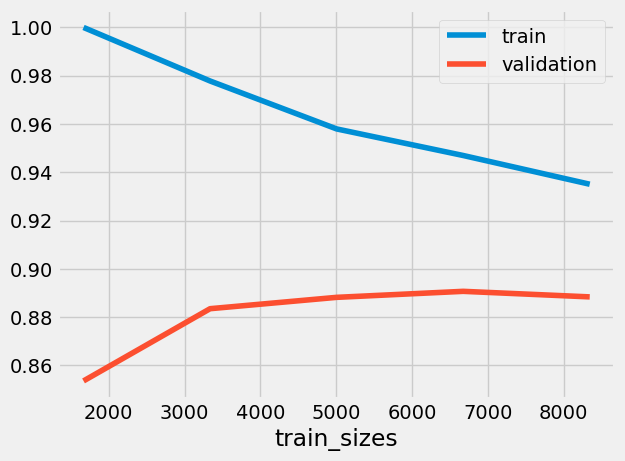

In [72]:
show_learning_curve(bagging_model)

In [73]:
tuned_coeffs['Bagging'] = {
    'MCC': matthews_corrcoef(y_test, bagging_y_pred),
    'F1 score': f1_score(y_test, bagging_y_pred, average='weighted'),
    'Precision': precision_score(y_test, bagging_y_pred, average='weighted')
}

#### 3.3.4 Random Forest Classifier

In [74]:
rf_model = classifiers['Random Forest']
rf_model

RandomForestClassifier(random_state=42)

In [75]:
param_grid = {
    'n_estimators': [10, 100],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [None, 1, 5],
}

In [76]:
best_params, best_score, best_model = find_best_hyperparameters(rf_model, param_grid, x_train, y_train)
best_params, best_score, best_model

({'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100},
 0.9919463087248322,
 RandomForestClassifier(criterion='entropy', random_state=42))

Matthews Correlation Coefficient (MCC):  0.9929055085415089


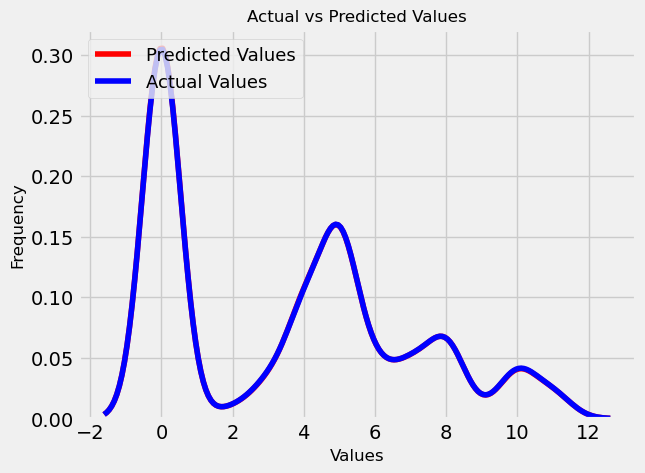

In [77]:
forest_model = best_model
forest_model.fit(x_train, y_train)
forest_y_pred = forest_model.predict(x_test)
print('Matthews Correlation Coefficient (MCC): ', matthews_corrcoef(y_test, forest_y_pred))

# simple comparaison
compare_values(y_test, forest_y_pred)

This model also denotes an almost perfect prediction. We'll have to decide between the three different metrics later to see which model is performing the best between **XGBoost** and **Random Forest Classifier**.

In [ ]:
show_learning_curve(forest_model)

In [79]:
tuned_coeffs['Random Forest'] = {
    'MCC': matthews_corrcoef(y_test, forest_y_pred),
    'F1 score': f1_score(y_test, forest_y_pred, average='weighted'),
    'Precision': precision_score(y_test, forest_y_pred, average='weighted')
}

#### 3.3.5 Comparing the models after tuning

In [80]:
tuned_coeffs

{'XGBoost': {'MCC': 0.9980090904057435,
  'F1 score': 0.998461908135881,
  'Precision': 0.9984768218887389},
 'Bagging': {'MCC': 0.8642843027754116,
  'F1 score': 0.8946457938251008,
  'Precision': 0.8992106606826394},
 'Random Forest': {'MCC': 0.9929055085415089,
  'F1 score': 0.9945389615806811,
  'Precision': 0.9945564452988916}}

In [81]:
tuned_coeff_df = pd.DataFrame.from_dict(tuned_coeffs, orient='index', columns=['MCC', 'F1 score', 'Precision'])
tuned_coeff_df

MCC  F1 score  Precision
XGBoost        0.998009  0.998462   0.998477
Bagging        0.864284  0.894646   0.899211
Random Forest  0.992906  0.994539   0.994556

In [82]:
fig = go.Figure()
sorted_tuned_coeffs = tuned_coeff_df.sort_values(by=['MCC', 'F1 score', 'Precision'], ascending=False)
for i, metric in enumerate(list(sorted_tuned_coeffs.columns)):
    fig.add_trace(go.Bar(x=sorted_tuned_coeffs.index,
                         y=sorted_tuned_coeffs[metric],
                         name=metric,
                         marker_color=colors[i]
                        ))

# Customize the layout (optional)
fig.update_layout(  # Create grouped bars
    title='Metrics for each model after tuning',
    xaxis_title='Model',
    yaxis_title='Metrics',
    xaxis_tickangle=-45,  # Rotate x-axis labels
    width=1000,  # Set the width
    height=700  # Set the height
)

# Show the Plotly figure
fig.show()

The XGBoost model is still the best, we can even notice that the metrics for the other models actually **decreased**.\
XGBoost's MCC increased mildly after the tuning even though, honestly, the model didn't really need much tuning in the first place.\
So we will stick to the ***XGBoost*** model to use in our API.

### 3.4 Storing the chosen model

In [83]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

We see that the best parameters have been used to instantiate this model, so we can finally save the model as it is. 

I wanted to use Pickle library as seen in our *Machine Learning* course, but using pickle for model persistence is not the most efficient or recommended way to save XGBoost models. It may work for simple use cases, but for production systems or larger models, consider using more efficient model serialization methods like XGBoost's native binary model format.\
So, might as well use it now.

In [84]:
xgb_model.save_model('best_model.model')

#### 3.4.1 Explaining the chosen model (XGBoost)

In [85]:
"""
conda install -c conda-forge shap
"""

'\nconda install -c conda-forge shap\n'

In [86]:
import shap

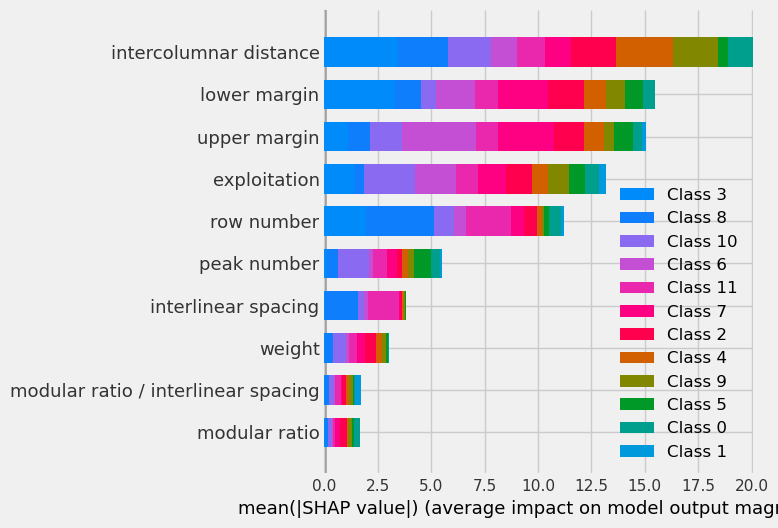

In [87]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type='bar')

Our assumptions from the correlatio nmatrix turned out to be inaccurate, as the 3 features having the most average impact on the output prediction are:
* intercolumnar distance,
* lower margin,
* upper margin.

## 4. API

***The API was made using Flask***\
You can use and interact with it by running the `app.py` file and connecting to http://127.0.0.1:5000/ on your browser (preferably Chrome)

In [ ]:
!python app.py